In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def psd_graph(filepath, min_freq=0, max_freq=40000):
    sample_rate, audio_data = wavfile.read(filepath)
    
    # perform fast fourier transform
    frequencies = np.fft.fftfreq(len(audio_data), d=1/sample_rate)
    fft_values = np.fft.fft(audio_data)

    psd = np.abs(fft_values) ** 2 / len(fft_values)
    
    # set range of frquency
    min_freq_index = np.argmax(frequencies >= min_freq)
    max_freq_index = np.argmax(frequencies >= max_freq)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(frequencies[min_freq_index:max_freq_index], 10 * np.log10(psd[min_freq_index:max_freq_index]))
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power Spectral Density (dB/Hz)")
    ax.set_title(f"Power Spectral Density, {filepath[-17:-11]}")
    ax.set_ylim([15, 225])
    ax.grid(visible=True)
    return ax

<Axes: title={'center': 'Power Spectral Density, 210102'}, xlabel='Frequency (Hz)', ylabel='Power Spectral Density (dB/Hz)'>

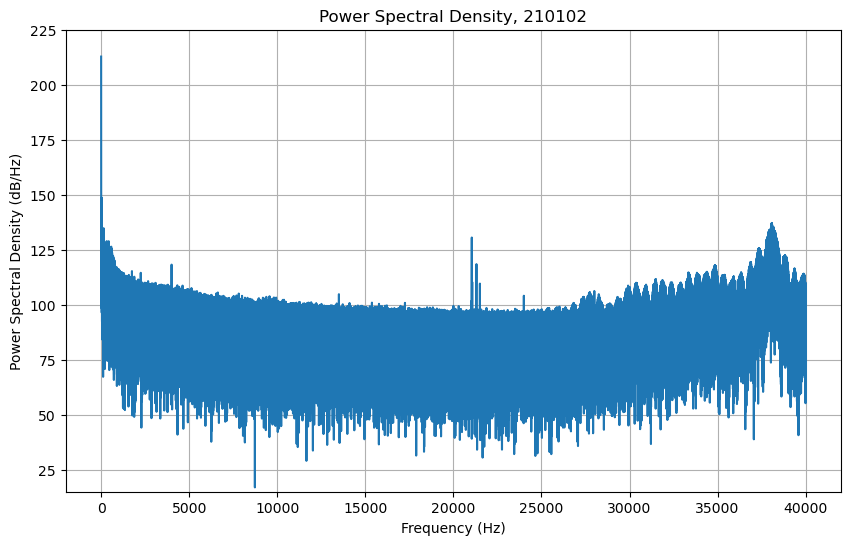

In [42]:
psd_graph("data/california-pam/2min_MARS_20210102_003424.wav")

<Axes: title={'center': 'Power Spectral Density, 210110'}, xlabel='Frequency (Hz)', ylabel='Power Spectral Density (dB/Hz)'>

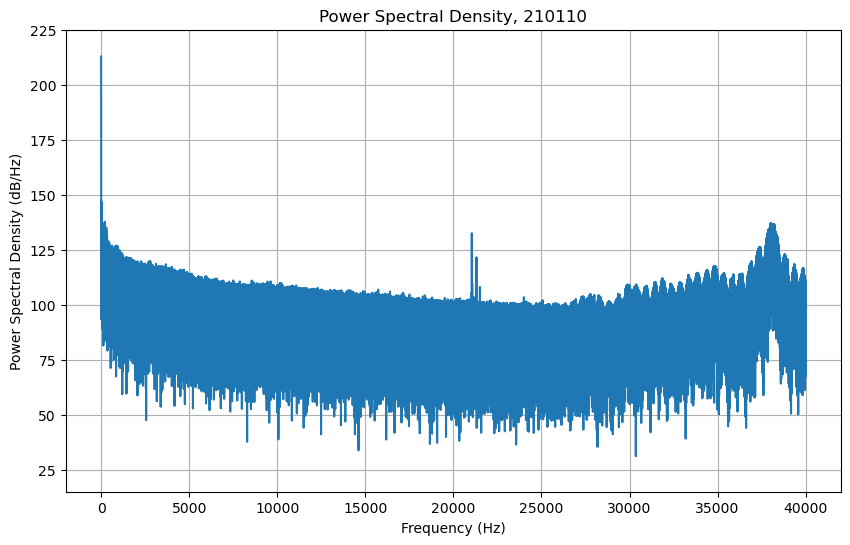

In [50]:
psd_graph("data/california-pam/2min_MARS_20210110_003413.wav")

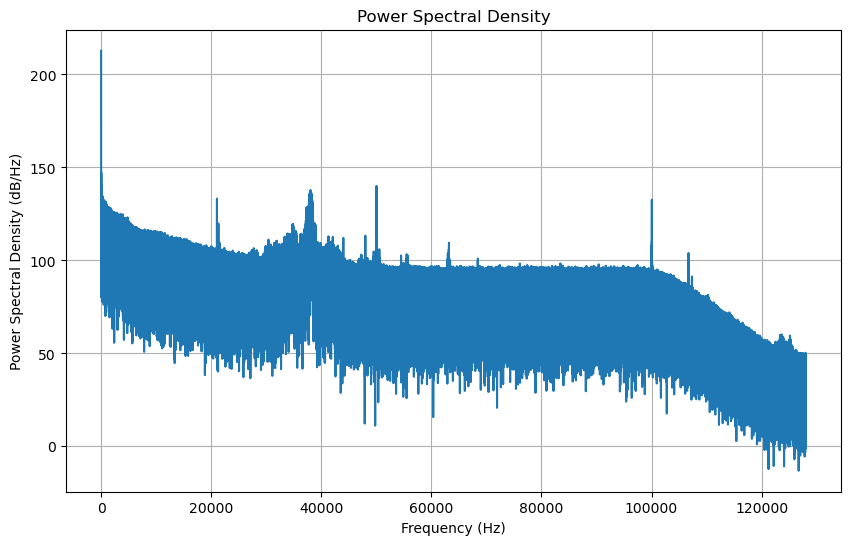

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], 10 * np.log10(psd[:len(psd)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (dB/Hz)")
plt.title("Power Spectral Density")
plt.grid()
plt.show()

# 